

# Project: Investigate a Dataset - [tmdb-movies]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

# Import libraries

In [15]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import sys
print(sys.executable)
from wordcloud import WordCloud, STOPWORDS
from warnings import filterwarnings
filterwarnings('ignore')


D:\anaconda3\python.exe


<a id='wrangling'></a>
## Data Wrangling
loading the data and check the cleanliness for analysis


In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb-movies.csv')

In [3]:
#view first 5 rows
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [7]:
#view dimentions of dataset
df.shape

(10866, 21)

In [9]:
#view columns name
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [5]:
#View statistical properties of dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,10866.0,6.606418e+04,9.213014e+04,5.000000,10596.250000,20669.000000,7.561000e+04,4.178590e+05
popularity,10866.0,6.464410e-01,1.000185e+00,0.000065,0.207583,0.383856,7.138170e-01,3.298576e+01
budget,10866.0,1.462570e+07,3.091321e+07,0.000000,0.000000,0.000000,1.500000e+07,4.250000e+08
revenue,10866.0,3.982332e+07,1.170035e+08,0.000000,0.000000,0.000000,2.400000e+07,2.781506e+09
runtime,10866.0,1.020709e+02,3.138141e+01,0.000000,90.000000,99.000000,1.110000e+02,9.000000e+02
vote_count,10866.0,2.173897e+02,5.756191e+02,10.000000,17.000000,38.000000,1.457500e+02,9.767000e+03
vote_average,10866.0,5.974922e+00,9.351418e-01,1.500000,5.400000,6.000000,6.600000e+00,9.200000e+00
release_year,10866.0,2.001323e+03,1.281294e+01,1960.000000,1995.000000,2006.000000,2.011000e+03,2.015000e+03
budget_adj,10866.0,1.755104e+07,3.430616e+07,0.000000,0.000000,0.000000,2.085325e+07,4.250000e+08
revenue_adj,10866.0,5.136436e+07,1.446325e+08,0.000000,0.000000,0.000000,3.369710e+07,2.827124e+09


In [6]:
#Checking For datatypes of the attributes and counts non_null
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [7]:
df['release_date'] = pd.to_datetime(df['release_date']).dt.date
df['release_date'].head()

0    2015-06-09
1    2015-05-13
2    2015-03-18
3    2015-12-15
4    2015-04-01
Name: release_date, dtype: object

In [8]:
#counting duplicated values
df.duplicated().sum()

1

In [9]:
#counting null values to the data frame
df.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64


### Data Cleaning

 

In [10]:
df.drop(labels=['imdb_id','popularity','cast','homepage','tagline','overview'], axis=1, inplace=True)


In [11]:
df.head()

,id,budget,revenue,original_title,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,150000000,1513528810,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,150000000,378436354,Mad Max: Fury Road,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,110000000,295238201,Insurgent,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,190000000,1506249360,Furious 7,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [12]:
df.drop_duplicates(inplace= True)
df.duplicated().sum()

0

In [13]:
#dropping null values
df.dropna(inplace=True)
df.isna().sum()

id                      0
budget                  0
revenue                 0
original_title          0
director                0
keywords                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

In [14]:
# Clean the invalid data and check the statistics again
index_err = df.query('runtime == 0 or budget == 0 or revenue == 0').index
df.drop(index_err, axis=0, inplace=True)

df.describe()

,id,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,3679.000000,3.679000e+03,3.679000e+03,3679.000000,3679.000000,3679.000000,3679.000000,3.679000e+03,3.679000e+03
mean,39215.383256,3.809475e+07,1.113799e+08,109.561022,547.413156,6.182414,2001.093775,4.536425e+07,1.420115e+08
std,67232.490572,4.267272e+07,1.793326e+08,19.855158,894.797209,0.789603,11.377724,4.519110e+07,2.194811e+08
min,5.000000,1.000000e+00,2.000000e+00,26.000000,10.000000,2.200000,1960.000000,9.693980e-01,2.861934e+00
25%,5486.500000,1.000000e+07,1.488093e+07,96.000000,78.000000,5.700000,1995.000000,1.381637e+07,2.037518e+07
50%,11022.000000,2.500000e+07,4.802797e+07,106.000000,218.000000,6.200000,2004.000000,3.102074e+07,6.546432e+07
75%,37954.000000,5.000000e+07,1.296864e+08,120.000000,595.000000,6.700000,2010.000000,6.213011e+07,1.704364e+08
max,417859.000000,4.250000e+08,2.781506e+09,338.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


# visualizing data

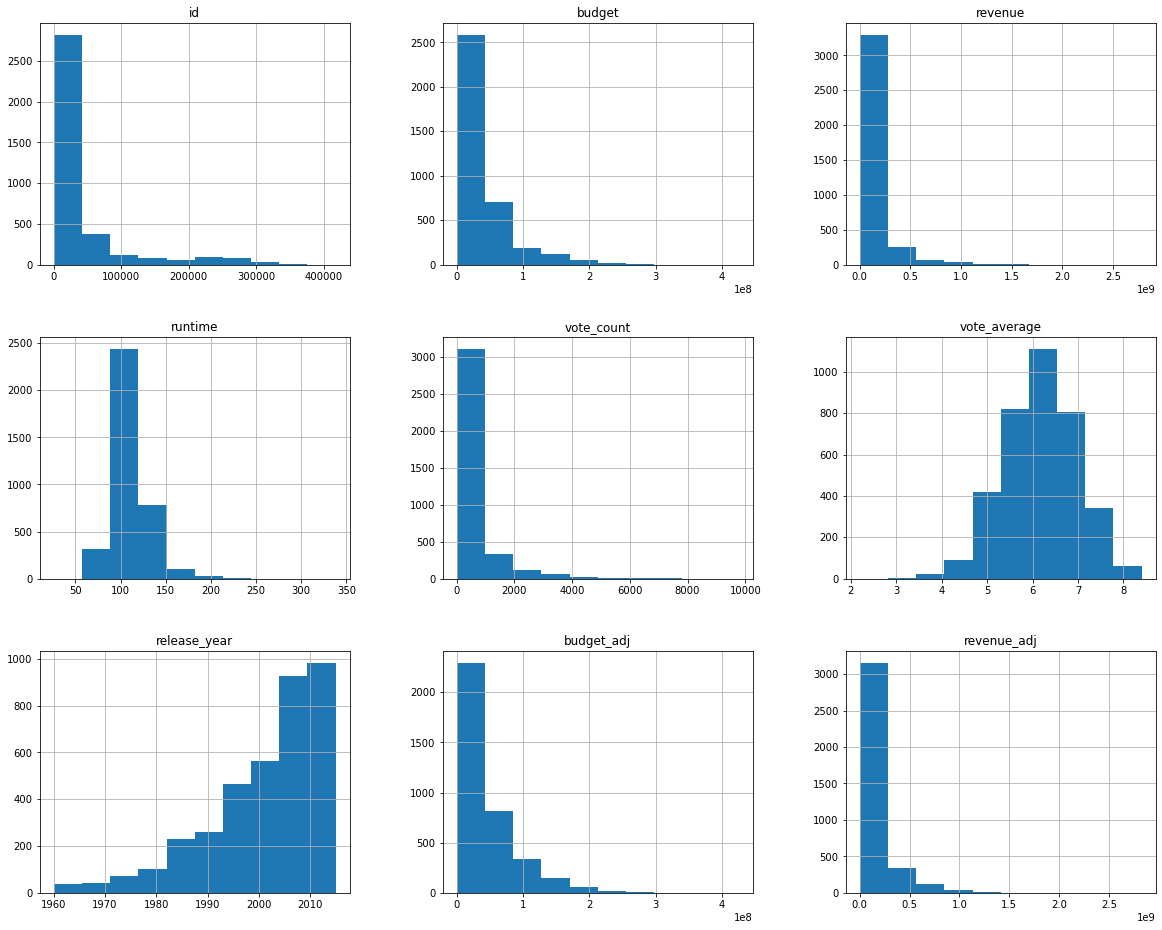

In [15]:
df.hist(figsize=(20,16));

## the relation between budget and revenue :

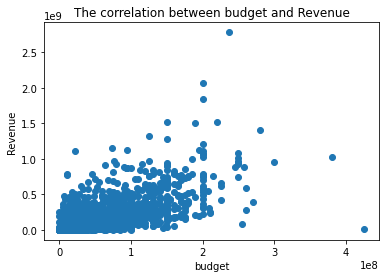

In [16]:
# Draw the scatterplot of the budget and revenue
plt.scatter(x=df.budget, y=df.revenue)
plt.title('The correlation between budget and Revenue')
plt.xlabel('budget')
plt.ylabel('Revenue')

plt.show()

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (Which genres are most popular from year to year?)

In [17]:
genres = df.groupby('release_year')[['genres']].sum()
genres

,genres
release_year,
1960,Drama|Horror|ThrillerAction|Adventure|WesternA...
1961,Adventure|Animation|Comedy|FamilyComedy|Drama|...
1962,Adventure|Action|ThrillerAdventure|Drama|Histo...
1963,Action|Thriller|AdventureHorrorComedy|Mystery|...
1964,Adventure|Action|ThrillerDrama|Comedy|WarComed...
1965,Adventure|Action|ThrillerDrama|Family|Music|Ro...
1966,DramaMystery|ThrillerAction|WesternAction|Adve...
1967,Family|Animation|AdventureComedy|Drama|Romance...
1968,Science Fiction|Mystery|AdventureAdventure|Sci...


,mean,std
genres,,
Comedy,2.680251e+07,2.147255e+07
Comedy|Drama|Romance,2.141113e+07,2.143839e+07
Comedy|Romance,2.952033e+07,2.373896e+07
Drama,2.189827e+07,2.150054e+07
Drama|Romance,1.952263e+07,1.757550e+07


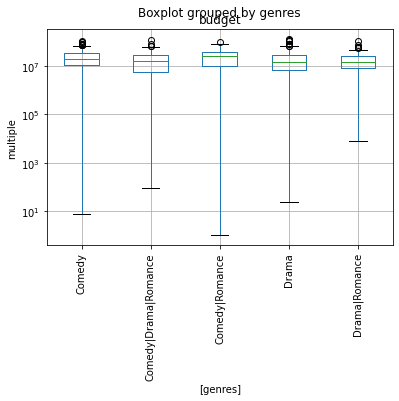

In [18]:
#sort the data according to the sample numbers . selecting the top 5
df_1 =df.groupby(['genres'])[['id']].count().sort_values(by=['id'],ascending =False)[0:5]
df_new=df[df['genres'].isin(df_1.index.values.tolist())]
#remove budget=0
df_new1=df_new[df_new['budget']>0]

df_new1.boxplot(column=['budget'],by=['genres'],rot=90).set_yscale('log')
plt.ylabel("multiple")
pd.DataFrame(df_new1.groupby(['genres'])['budget'].describe().loc[:,['mean','std']])

In [19]:
def mytitles(title,xtitle,ytitle):
    sns.barplot(x=genres.columns,y=genres.sum(),data=df1)
    #add title and format it
    plt.title(title.title(),fontsize=20,weight='bold')
    #add x label and format it
    plt.xlabel(xtitle.title(),fontsize=15,weight='bold')
    #add y label and format it
    plt.ylabel(ytitle.title(),fontsize=15,weight='bold')
    

In [20]:
genres=df['genres'].str.get_dummies(sep='|')


In [21]:
df1=genres.sum().reset_index()

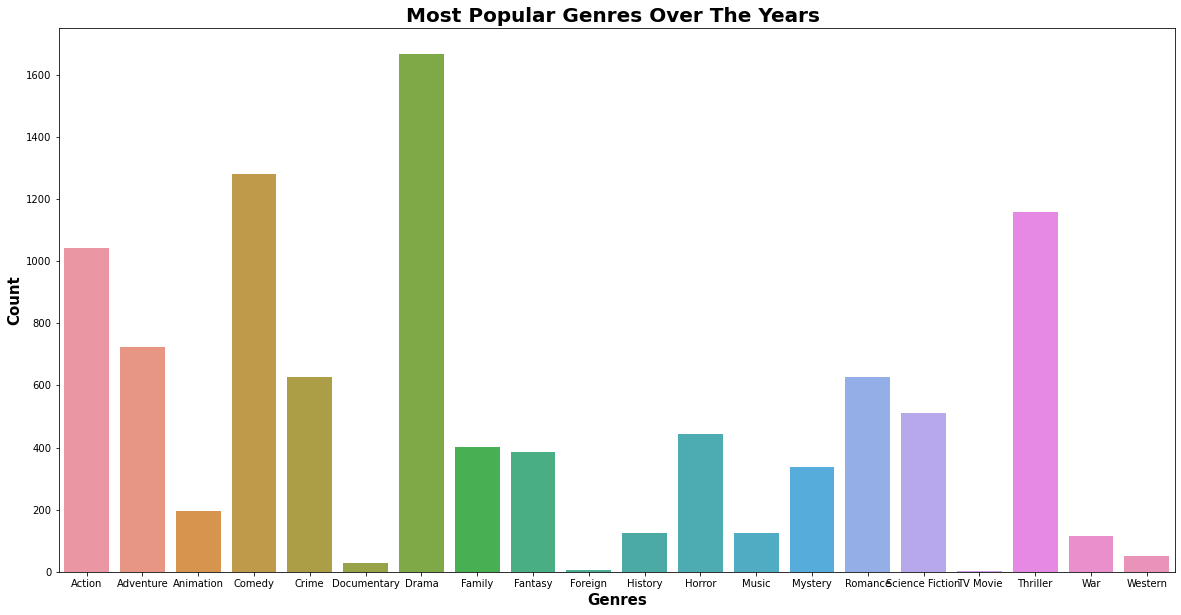

In [22]:
plt.figure(figsize=(20,10))
mytitles('most popular genres over the years ','Genres','count')

plt.show()

# Drama is most movie type over the years

,id
genres,
Comedy,223
Comedy|Drama|Romance,84
Comedy|Romance,98
Drama,232
Drama|Romance,102


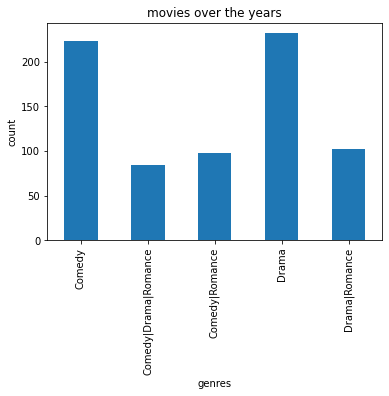

In [23]:
df_new1.groupby(['genres'])['id'].count().plot(kind='bar').set_ylabel('count')
plt.title('movies over the years')
df_new1.groupby(['genres'])[['id']].count()

,budget
count,3.679000e+03
mean,3.809475e+07
std,4.267272e+07
min,1.000000e+00
25%,1.000000e+07
50%,2.500000e+07
75%,5.000000e+07
max,4.250000e+08


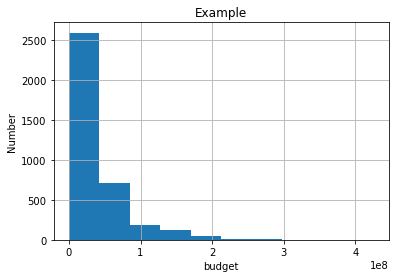

In [24]:
ax=df['budget'].hist()
ax.set_ylabel('Number')
ax.set_xlabel('budget')
ax.set_title('Example')
pd.DataFrame(df['budget'].describe())

### Research Question 2  (highest 10 movies revenues)

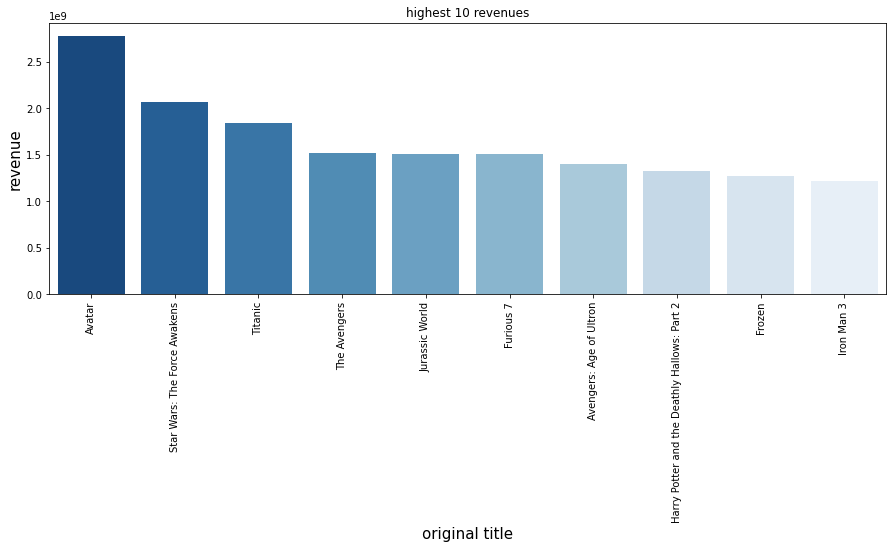

In [25]:
plt.figure(figsize=(15,5))
dff=df[['original_title','revenue']].sort_values('revenue',ascending=False).head(10)
sns.barplot(x='original_title',y='revenue',data=dff,palette='Blues_r')
plt.xlabel('original title',fontsize=15)
plt.ylabel('revenue',fontsize=15)
plt.title('highest 10 revenues')
plt.xticks(rotation=90)
plt.show()

# Avatar is the most profitable movie among the top 10 


### Research Question 3  (what is the most production company that achieve highest revenue?)

In [17]:
production_companies=df['production_companies'].str.get_dummies(sep='|')

In [18]:
df2=production_companies[production_companies.columns].apply(lambda x: sum(x.values))

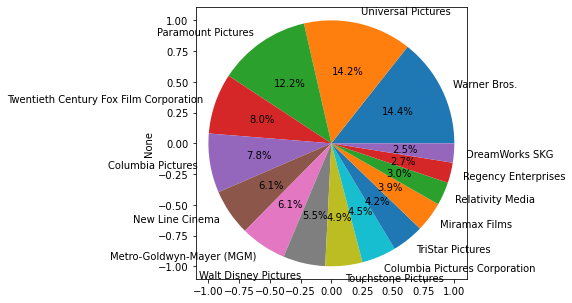

In [20]:
df2.sort_values(0,ascending=False).head(15).plot.pie(autopct='%1.1f%%',figsize=(5,5),frame=True)
plt.show()

# Universal pictures is the most productive company for movies

# Research Question 4 (who has directed most movies ?)

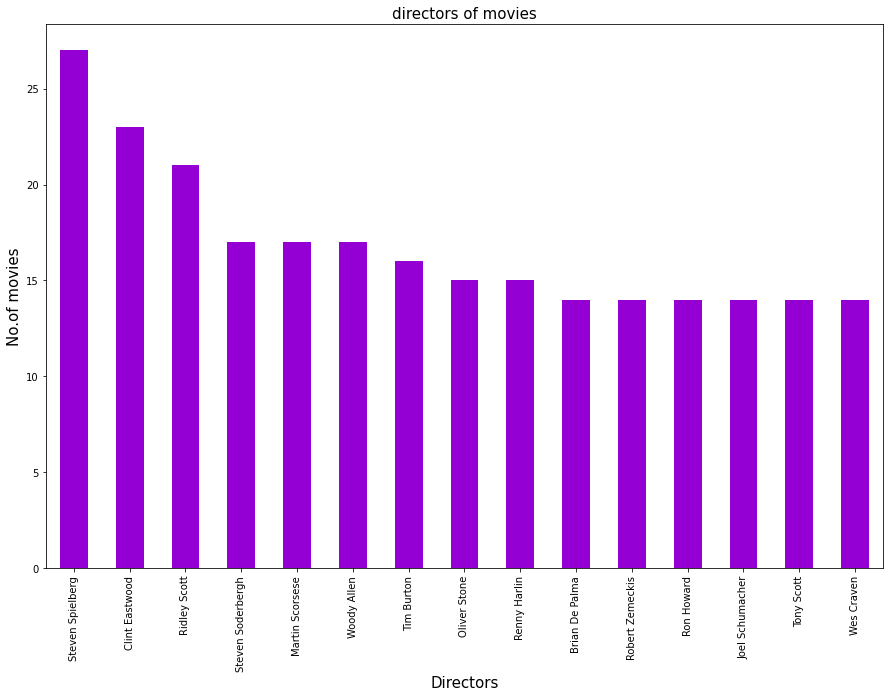

In [29]:
df['director'].value_counts().head(15).plot.bar(figsize=(15,10),color='darkviolet')
plt.xlabel('Directors',fontsize=15)
plt.ylabel('No.of movies',fontsize=15)
plt.title('directors of movies',fontsize=15)
plt.show()

# top 15 directors with most number of movies

In [30]:
df['director'][df['director']=='Woody Allen'].count()

17

## Woody Allen has directed most movies about 45 movies

# Research Question 5 (most coomon words may help while searching!)

In [31]:
text=','.join(df['keywords'].str.cat(sep='|').split('|'))

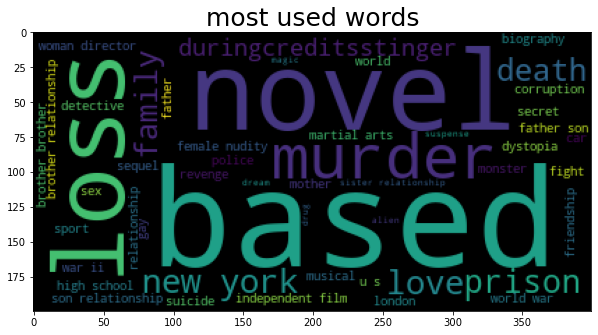

In [32]:
wc = WordCloud(max_words=50,background_color='black').generate(text)
plt.figure(figsize=(10,10))
plt.imshow(wc)
plt.title('most used words',fontsize=25)
plt.show()

# based is the biggest word so , it's the most repetitive word

# Research Question 6 (year that released most movies)

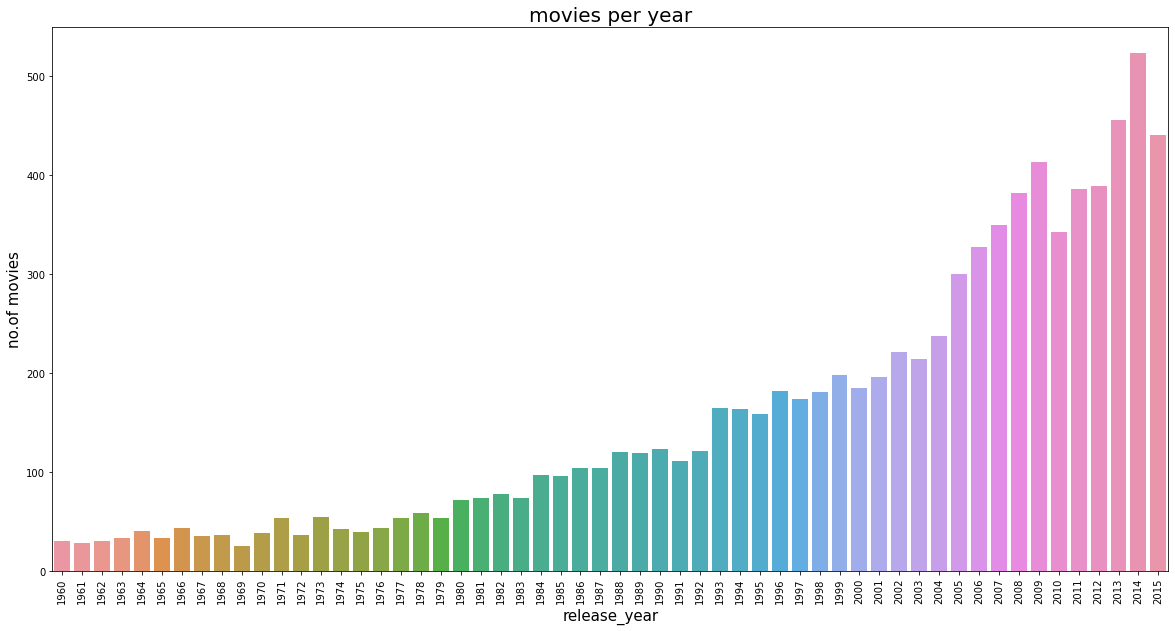

In [21]:
plt.figure(figsize=(20,10))
sns.countplot(df['release_year'])
plt.title('movies per year',fontsize=20)
plt.xlabel('release_year',fontsize=15)
plt.ylabel('no.of movies',fontsize=15)
plt.xticks(rotation=90)
plt.show()

# 2014 is the year that most movies are released in

<a id='conclusions'></a>
## Conclusions
1-Drama is most movie type over the years

2-Avatar is the most profitable movie among the top 10

3-Universal pictures is the most productive company for movies

4-Woody Allen has directed most movies about 45 movies

5-based is the biggest word so , it's the most repetitive word

6-2014 is the year that most movies are released in





## Limitations 
-The data is not up to date till today. 


In [34]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1